Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Class Directory: train
/content/drive/My Drive/Lymphoma

Total :  Found 15000 files belonging to 3 classes.

For Training :  Found 10500 images belonging to 3 classes.

For Validation :  Found 2250 images belonging to 3 classes.

For Testing :  Found 2250 images belonging to 3 classes.

No of Classes :  3
Classes :  ['test', 'train', 'val']
Image Shape :  (32, 256, 256, 3)
Epoch 1/10
329/329 [==============================] - ETA: 0s - loss: 1.5028 - accuracy: 0.6950
Epoch 1: val_loss improved from inf to 0.83482, saving model to trainEfficientNetB0.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


329/329 [==============================] - 1222s 4s/step - loss: 1.5028 - accuracy: 0.6950 - val_loss: 0.8348 - val_accuracy: 0.8053 - lr: 0.0010
Epoch 2/10
329/329 [==============================] - ETA: 0s - loss: 0.6692 - accuracy: 0.8452
Epoch 2: val_loss improved from 0.83482 to 0.67425, saving model to trainEfficientNetB0.h5
329/329 [==============================] - 1137s 3s/step - loss: 0.6692 - accuracy: 0.8452 - val_loss: 0.6743 - val_accuracy: 0.8520 - lr: 0.0010
Epoch 3/10
329/329 [==============================] - ETA: 0s - loss: 0.5353 - accuracy: 0.8821
Epoch 3: val_loss improved from 0.67425 to 0.40787, saving model to trainEfficientNetB0.h5
329/329 [==============================] - 1092s 3s/step - loss: 0.5353 - accuracy: 0.8821 - val_loss: 0.4079 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/10
329/329 [==============================] - ETA: 0s - loss: 0.4461 - accuracy: 0.9011
Epoch 4: val_loss did not improve from 0.40787
329/329 [==============================] - 10

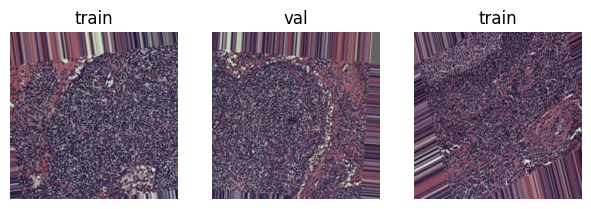

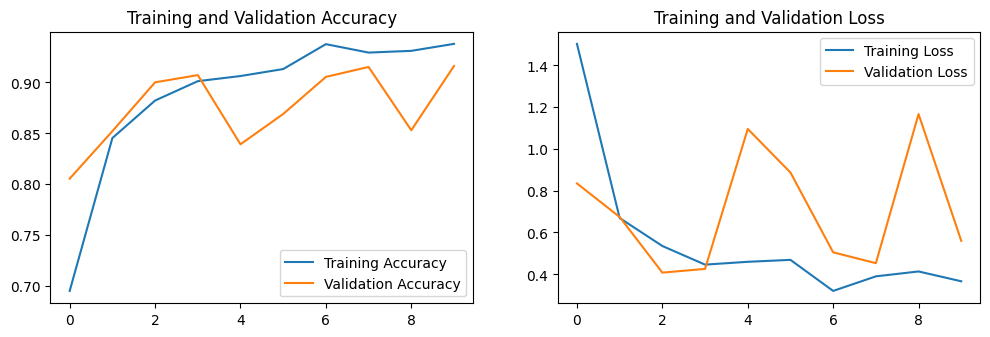

71/71 [==============================] - 831s 12s/step - loss: 0.5506 - accuracy: 0.9107
Accuracy on the Test Set = 91.07 %
Model Saved!
71/71 [==============================] - 188s 3s/step
ACCURACY=0.904
RECALL=0.904
PRECISION=0.9041359157539183
F1 Score=0.903912124148589
Class Directory: val
/content/drive/My Drive/Lymphoma

Total :  Found 15000 files belonging to 3 classes.

For Training :  Found 10500 images belonging to 3 classes.

For Validation :  Found 2250 images belonging to 3 classes.

For Testing :  Found 2250 images belonging to 3 classes.

No of Classes :  3
Classes :  ['test', 'train', 'val']
Image Shape :  (32, 256, 256, 3)
Epoch 1/10
329/329 [==============================] - ETA: 0s - loss: 1.5593 - accuracy: 0.6969
Epoch 1: val_loss improved from inf to 1.23626, saving model to valEfficientNetB0.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


329/329 [==============================] - 1122s 3s/step - loss: 1.5593 - accuracy: 0.6969 - val_loss: 1.2363 - val_accuracy: 0.7462 - lr: 0.0010
Epoch 2/10
329/329 [==============================] - ETA: 0s - loss: 0.7286 - accuracy: 0.8387
Epoch 2: val_loss improved from 1.23626 to 0.96741, saving model to valEfficientNetB0.h5
329/329 [==============================] - 1097s 3s/step - loss: 0.7286 - accuracy: 0.8387 - val_loss: 0.9674 - val_accuracy: 0.7951 - lr: 0.0010
Epoch 3/10
329/329 [==============================] - ETA: 0s - loss: 0.5736 - accuracy: 0.8773
Epoch 3: val_loss improved from 0.96741 to 0.63862, saving model to valEfficientNetB0.h5
329/329 [==============================] - 1098s 3s/step - loss: 0.5736 - accuracy: 0.8773 - val_loss: 0.6386 - val_accuracy: 0.8698 - lr: 0.0010
Epoch 4/10
329/329 [==============================] - ETA: 0s - loss: 0.5305 - accuracy: 0.8943
Epoch 4: val_loss did not improve from 0.63862
329/329 [==============================] - 1097s 

In [ ]:
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import EfficientNetB0  # Retaining only EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from glob import glob
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
78\\
    className = c
    cpath = os.path.join(mpath)
    print(cpath)

    # Function to initialize data generators for a specific class
    def initiateGenerator(path):
        base_path = path
        print(f"\nTotal : ", end=" ")
        dataset = tf.keras.preprocessing.image_dataset_from_directory(
            batch_size=32, directory=base_path)

        datagen = ImageDataGenerator()

        print("\nFor Training : ", end=" ")
        train_generator = datagen.flow_from_directory(
            os.path.join(base_path, 'train'),
            target_size=(224, 224),
            batch_size=32,
            class_mode='categorical',
            shuffle=True
        )

        print("\nFor Validation : ", end=" ")
        val_generator = datagen.flow_from_directory(
            os.path.join(base_path, 'val'),
            target_size=(224, 224),
            batch_size=32,
            class_mode='categorical',
            shuffle=False
        )

        print("\nFor Testing : ", end=" ")
        test_generator = datagen.flow_from_directory(
            os.path.join(base_path, 'test'),
            target_size=(224, 224),
            batch_size=32,
            class_mode='categorical',
            shuffle=False
        )

        class_names = dataset.class_names
        noOfClasses = len(class_names)
        print("\nNo of Classes : ", noOfClasses)
        print("Classes : ", class_names)

        plt.figure(figsize=(10, 10))
        for images, labels in dataset.take(1):
            for i in range(noOfClasses):
                ax = plt.subplot(4, 4, i + 1)
                plt.imshow(images[i].numpy().astype("uint8"))
                plt.title(class_names[labels[i]])
                plt.axis("off")

        for image_batch, labels_batch in dataset:
            print("Image Shape : ", image_batch.shape)
            break

        return noOfClasses, class_names, train_generator, val_generator, test_generator

    noOfClasses, class_names, train_generator, val_generator, test_generator = initiateGenerator(cpath)

    # Function to initialize and compile a model (EfficientNetB0)
    def initiateModel(noOfClasses, lr, model_name):
        model = EfficientNetB0(
            input_shape=IMAGE_SIZE + [3],
            include_top=False,
            weights="imagenet"
        )

        for layer in model.layers:
            layer.trainable = False

        x = Flatten()(model.output)
        prediction = Dense(noOfClasses, activation='softmax')(x)

        model = keras.models.Model(inputs=model.input, outputs=prediction)

        opt = tf.keras.optimizers.Adam(learning_rate=lr)

        model.compile(optimizer=opt,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

        annealer = ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1, min_lr=1e-3)
        checkpoint = ModelCheckpoint(className + model_name + '.h5', verbose=1, save_best_only=True)

        return model, annealer, checkpoint

    # Function to fit a model
    def modelFit(model, train_generator, validation_generator, epochs=20, batchSize=256, callbacks=[]):
        history = model.fit(
            train_generator,
            validation_data=validation_generator,
            epochs=epochs,
            batch_size=batchSize,
            callbacks=callbacks,
            steps_per_epoch=len(train_generator),
            validation_steps=len(validation_generator)
        )
        return history

    # Function to plot training history
    def plotOutput(history, className, epochs):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']

        loss = history.history['loss']
        val_loss = history.history['val_loss']

        epochs_range = range(epochs)

        plt.figure(figsize=(12, 12))
        plt.subplot(3, 2, 1)
        plt.plot(epochs_range, acc, label='Training Accuracy')
        plt.plot(epochs_range, val_acc, label='Validation Accuracy')
        plt.legend(loc='lower right')
        plt.title('Training and Validation Accuracy')

        plt.subplot(3, 2, 2)
        plt.plot(epochs_range, loss, label='Training Loss')
        plt.plot(epochs_range, val_loss, label='Validation Loss')
        plt.legend(loc='upper right')
        plt.title('Training and Validation Loss')

        plt.savefig(className + '_graph.png')
        plt.show()

    # Function to evaluate a model
    def evalModel(model, test_generator):
        evl = model.evaluate(test_generator)
        acc = evl[1] * 100
        msg = f'Accuracy on the Test Set = {acc:5.2f} %'
        print(msg)
        return acc

    # Function to save a model
    def saveModel(model, className, model_name):
        model.save(className + " - " + model_name + "Final.h5")
        print("Model Saved!")

    # Function to plot a confusion matrix
    def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
        accuracy = np.trace(cm) / float(np.sum(cm))
        misclass = 1 - accuracy

        if cmap is None:
            cmap = plt.get_cmap('Blues')

        plt.figure(figsize=(15, 15))
        plt.imshow(cm, interpolation='nearest', cmap=cmap)
        plt.title(title)
        plt.colorbar()

        if target_names is not None:
            tick_marks = np.arange(len(target_names))
            plt.xticks(tick_marks, target_names, rotation=45)
            plt.yticks(tick_marks, target_names)

        if normalize:
            cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

        thresh = cm.max() / 1.5 if normalize else cm.max() / 2
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

        plt.tight_layout()
        plt.ylabel('True label')
        plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

    # Function to perform ensemble predictions
    def Ensemble(model_names, test_generator, class_names, className):
        y_true = test_generator.classes
        pred = []

        for model_name in model_names:
            model = keras.models.load_model(className + model_name + '.h5')
            pred.append(model.predict(test_generator))

        y_pred = np.sum(pred, axis=0)
        y_pred = np.argmax(y_pred, axis=1)

        conf_mat = confusion_matrix(y_true, y_pred)
        acc = np.trace(conf_mat) / float(np.sum(conf_mat))
        recall = recall_score(y_true, y_pred, average='weighted')
        precision = precision_score(y_true, y_pred, average='weighted')
        f1 = f1_score(y_true, y_pred, average='weighted')

        print(f"ACCURACY={acc}")
        print(f"RECALL={recall}")
        print(f"PRECISION={precision}")
        print(f"F1 Score={f1}")

        plot_confusion_matrix(cm=conf_mat, target_names=class_names, title=className + " Confusion Matrix")

    # Train and evaluate EfficientNetB0 model (Retaining only EfficientNetB0)
    model_name = "EfficientNetB0"
    curEfficientNetB0, annealer, checkpoint = initiateModel(noOfClasses, lr, model_name)
    curHistory = modelFit(curEfficientNetB0, train_generator, val_generator, epochs=gEpochs, batchSize=256, callbacks=[annealer, checkpoint])
    plotOutput(curHistory, className, gEpochs)
    acc = evalModel(curEfficientNetB0, test_generator)
    saveModel(curEfficientNetB0, className, model_name)

    # Ensemble predictions
    model_names = ["EfficientNetB0"]  # Only EfficientNetB0 in the ensemble
    Ensemble(model_names, test_generator, class_names, className)
